# ML Assignment 1
  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split 

Reading the CSV file and making a dataframe from it:

In [2]:
df = pd.read_csv("Pima_Indian_diabetes.csv")

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,742.000000,752.000000,768.000000,746.000000,768.000000,757.000000,768.000000,749.000000,768.000000
mean,3.866601,119.966097,68.886078,20.309879,79.799479,31.711151,0.471876,33.761336,0.348958
std,3.479971,32.367659,19.427448,15.974523,115.244002,8.544789,0.331329,12.297409,0.476951
min,-5.412815,0.000000,-3.496455,-11.945520,0.000000,-16.288921,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.243750,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.500000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
features = ['Pregnancies','Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Filling the missing values by a random number picked between mean +/- std-dev

In [5]:
for feature in features:
    df[feature].fillna(value=np.random.normal(df[feature].mean(), df[feature].std()), inplace=True)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.839598,120.571970,68.886078,19.700989,79.799479,31.849485,0.471876,33.752868,0.348958
std,3.423524,32.296839,19.427448,16.138586,115.244002,8.560663,0.331329,12.144255,0.476951
min,-5.412815,0.000000,-3.496455,-11.945520,0.000000,-16.288921,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.275000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,22.000000,30.500000,32.300000,0.372500,30.000000,0.000000
75%,6.000000,142.000000,80.000000,32.000000,127.250000,36.800000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Filling in the negative values with zero

In [7]:
for feature in features:
    df.loc[df[feature] < 0, feature] = 0

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.858686,120.571970,68.895389,19.775787,79.799479,31.898337,0.471876,33.752868,0.348958
std,3.388120,32.296839,19.393614,16.032688,115.244002,8.340197,0.331329,12.144255,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.275000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,22.000000,30.500000,32.300000,0.372500,30.000000,0.000000
75%,6.000000,142.000000,80.000000,32.000000,127.250000,36.800000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Setting the upper bound of Insulin as 250

In [9]:
df.loc[df.Insulin >250, 'Insulin'] = 250

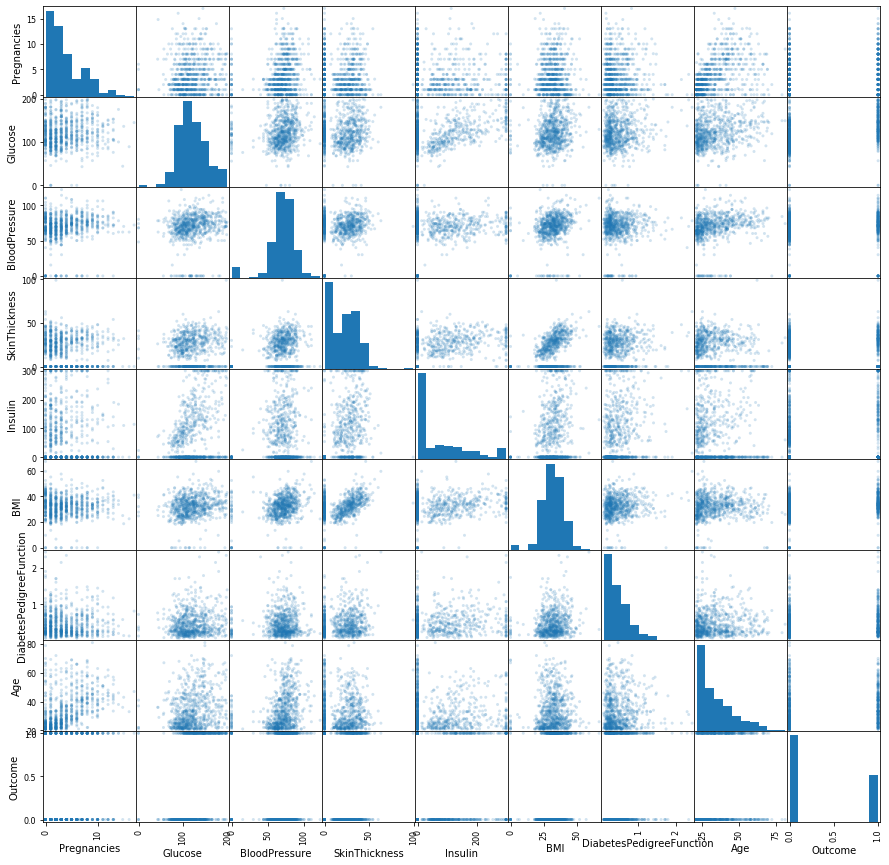

In [10]:
plot = scatter_matrix(df, alpha=0.2, figsize=(15, 15))

Following two observation can be made from data analysis

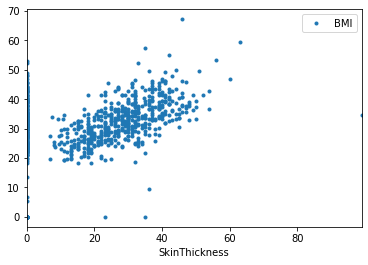

In [11]:
df.plot(x='SkinThickness', y='BMI', style='.')

In [12]:
zero_SkinThickness_data = df[ df.SkinThickness == 0 ]
non_zero_SkinThickness_data = df[ df.SkinThickness != 0]

train_X = non_zero_SkinThickness_data['BMI'].values.reshape(-1,1)
train_y = non_zero_SkinThickness_data['SkinThickness'].values.reshape(-1,1)
val_X = zero_SkinThickness_data['BMI'].values.reshape(-1,1)

model = LinearRegression()
model.fit(train_X, train_y)
predicted_y = model.predict(val_X)

j = 0
for i in df.index:
    if df.at[i, 'SkinThickness'] == 0:
        df.at[i, 'SkinThickness'] = predicted_y[j][0]
        j+=1



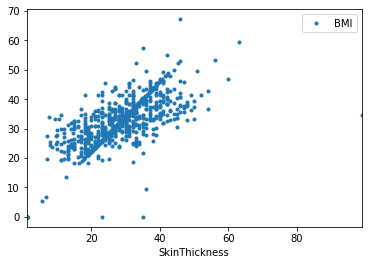

In [13]:
df.plot(x='SkinThickness', y='BMI', style='.')

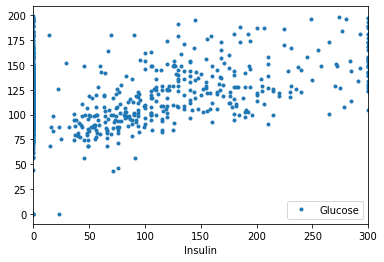

In [14]:
df.plot(x='Insulin', y='Glucose', style='.')

In [15]:
zero_insulin_data = df[ df.Insulin == 0 ]
non_zero_insulin_data = df[ df.Insulin != 0]

train_X = non_zero_insulin_data['Glucose'].values.reshape(-1,1)
train_y = non_zero_insulin_data['Insulin'].values.reshape(-1,1)
val_X = zero_insulin_data['Glucose'].values.reshape(-1,1)

model = LinearRegression()
model.fit(train_X, train_y)
predicted_y = model.predict(val_X)

j = 0
for i in df.index:
    if df.at[i, 'Insulin'] == 0:
        df.at[i, 'Insulin'] = predicted_y[j][0]
        j+=1


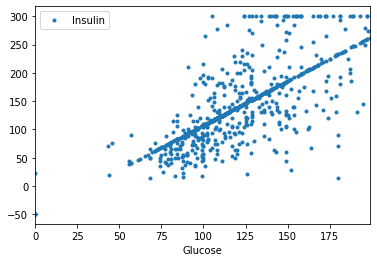

In [16]:
df.plot(x='Glucose', y='Insulin', style='.')

In [17]:
for feature in features:
    df[feature] = (df[feature] - df[feature].mean())/(df[feature].std())
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000
mean,8.789266e-17,-4.440892e-16,-6.476301e-16,2.839164e-16,5.088522e-17,3.029984e-16,2.498002e-16,1.804112e-16,0.348958
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.476951
min,-1.138887e+00,-3.733244e+00,-3.552478e+00,-2.693987e+00,-2.778765e+00,-3.824650e+00,-1.188778e+00,-1.050115e+00,0.000000
25%,-8.437382e-01,-6.679282e-01,-3.555495e-01,-6.072998e-01,-6.815311e-01,-5.543439e-01,-6.885198e-01,-8.030849e-01,0.000000
50%,-2.534403e-01,-1.105981e-01,1.600842e-01,-8.372264e-03,-1.514611e-01,4.815994e-02,-2.999328e-01,-3.090241e-01,0.000000
75%,6.320064e-01,6.634714e-01,5.725911e-01,5.927003e-01,5.860277e-01,5.877156e-01,4.659233e-01,5.967539e-01,1.000000
max,3.878645e+00,2.428350e+00,2.738252e+00,7.076418e+00,2.362601e+00,4.220723e+00,5.879733e+00,3.890492e+00,1.000000


In [18]:
accuracy = []

for i in range(100):
    df = df.sample(frac=1)
    X = df[df.columns[0:8]]
    y = df[df.columns[8]] 
    
    trainX, valX, trainY, valY = train_test_split(X, y, test_size = 0.20)
    lr = LogisticRegression(max_iter=2000, solver='lbfgs')
    lr.fit(trainX, trainY)
    accuracy.append(lr.score(valX, valY)*100)

In [19]:
average_accuracy = sum(accuracy)/len(accuracy)
print(average_accuracy, max(accuracy), min(accuracy))

75.90909090909088 85.06493506493507 68.18181818181817
